In [1]:
import csv #used for reading and parsing data from a text file
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#get the empty rows
filename='clean_cmj.txt'
datafile = csv.reader(open(filename, 'r'), delimiter='\t')

counter = 0 #counter for number of rows
empty_rows = []
for row in datafile:
    if len(row)==0: #test for an empty row
        empty_rows.append(counter)    
    counter += 1
print(empty_rows)

[4, 272, 540, 2127]


In [3]:
datafile = csv.reader(open(filename, 'r'), delimiter='\t')

# get position data
counter = 0 #counter for number of rows
pos_header = []
pos_units = []
pos_direction = []
pos_data = []
for row in datafile:
    if counter==empty_rows[0]+1:
        pos_header.append(row)
    elif counter==empty_rows[0]+2:
        pos_units.append(row)
    elif counter==empty_rows[0]+3:
        pos_direction.append(row)
    elif counter>empty_rows[0]+3 and counter<empty_rows[1] :
        pos_data.append(row)
    elif counter>=empty_rows[1]:
        break
    counter = counter + 1
    
datafile = csv.reader(open(filename, 'r'), delimiter='\t')
# get force data
counter1 = 0 #counter for number of rows
force_header = []
force_units = []
force_direction = []
force_data = []
for row in datafile:
    if counter1==empty_rows[1]+1:
        force_header.append(row)
    elif counter1==empty_rows[1]+2:
        force_units.append(row)
    elif counter1==empty_rows[1]+3:
        force_direction.append(row)
    elif counter1>empty_rows[1]+3 and counter1<empty_rows[2] :
        force_data.append(row)
    elif counter1>=empty_rows[2]:
        break
    counter1 = counter1 + 1
    
force_units[0][0]

's'

In [4]:
#make headers
pos_head_unit = []
counter = 0
i = 0
for i in range(len(pos_header[0])):
    if i == 0:
        head_plus_unit = pos_header[0][i]
        pos_head_unit.append(head_plus_unit)
    else:
        if counter == 0:
            head_plus_unit = pos_header[0][i] +  '_'  +   pos_direction[0][i]
            pos_head_unit.append(head_plus_unit) 
        else:
            head_plus_unit = pos_header[0][i-counter] +  '_'  + pos_direction[0][i] 
            pos_head_unit.append(head_plus_unit)    
            
        counter += 1
        if counter == 3:
            counter = 0
            
force_head_unit = []
counter1 = 0

for j in range(len(force_header[0])):
    if j == 0:
        fhead_plus_unit = force_header[0][j]
        force_head_unit.append(fhead_plus_unit)
    else:
        if counter1 == 0:
            fhead_plus_unit = force_header[0][j] +  '_'  +   force_direction[0][j]
            force_head_unit.append(fhead_plus_unit) 
        else:
            fhead_plus_unit = force_header[0][j-counter1] +  '_'  + force_direction[0][j] 
            force_head_unit.append(fhead_plus_unit)    
            
        counter1 += 1
        if counter1 == 3:
            counter1 = 0

In [5]:
df = pd.DataFrame(pos_data, columns=pos_head_unit)
df

,Time,L.Trunk_X,L.Trunk_Y,L.Trunk_Z,R.Trunk_X,R.Trunk_Y,R.Trunk_Z,DistalTrunk_X,DistalTrunk_Y,DistalTrunk_Z,...,L.LateralToe_Z,L.Toe_X,L.Toe_Y,L.Toe_Z,L.MedialToe_X,L.MedialToe_Y,L.MedialToe_Z,Sternum_X,Sternum_Y,Sternum_Z
0,1.995,584.802,368.122,1463.72,696.778,344.382,1443.02,647.762,307.389,1364.7,...,85.8714,386.115,509.881,95.7099,417.272,503.429,94.0016,0,0,0
1,2,585.143,372.558,1462.87,697.174,348.385,1442.69,648.002,310.272,1364.99,...,85.9492,386.206,509.883,95.8073,417.338,503.441,94.1124,0,0,0
2,2.005,585.515,376.922,1462.07,697.522,352.641,1442.18,648.513,313.319,1364.93,...,86.0493,386.16,509.847,95.9013,417.415,503.433,94.2271,0,0,0
3,2.01,586.007,382.054,1460.43,697.966,357.039,1441.33,649.064,316.477,1364.79,...,86.1561,386.328,509.871,95.9938,417.491,503.432,94.3023,0,0,0
4,2.015,586.421,386.697,1459.07,698.611,361.568,1440.2,649.649,319.677,1364.42,...,86.2862,386.38,509.861,96.0884,417.565,503.441,94.4099,0,0,0
5,2.02,586.908,391.577,1457.38,699.211,366.154,1438.95,650.184,322.981,1363.86,...,86.0474,386.443,509.905,96.1865,417.651,503.478,94.5225,0,0,0
6,2.025,587.515,396.74,1455.17,699.901,371.103,1437.29,650.866,326.457,1363.02,...,86.5008,386.505,509.919,96.3133,417.769,503.488,94.5875,0,0,0
7,2.03,588.019,402.05,1452.65,700.525,376.198,1435.22,651.471,329.948,1361.98,...,86.5688,386.635,509.985,96.471,417.841,503.525,94.6839,0,0,0
8,2.035,588.618,407.375,1449.85,701.273,381.439,1432.85,652.124,333.662,1360.7,...,86.6611,386.799,510.075,96.5676,417.974,503.608,94.7524,0,0,0
9,2.04,589.246,413.162,1446.58,702.064,387.053,1429.77,652.88,337.315,1359.05,...,86.82,387.006,510.191,96.6573,418.111,503.666,94.8028,0,0,0


In [6]:
df1 = pd.DataFrame(force_data, columns=force_head_unit)
df1

,Time,GRW1.F_X,GRW1.F_Y,GRW1.F_Z,GRW1.M_X,GRW1.M_Y,GRW1.M_Z,GRW1_X,GRW1_Y,GRW1_Z,...,GRW2.F_Z,GRW2.M_X,GRW2.M_Y,GRW2.M_Z,GRW2_X,GRW2_Y,GRW2_Z,GRW2.DA_X,GRW2.DA_Y,GRW2.DA_Z
0,1.995,13.7553,-9.25659,222.88,-166.037,111.734,-2690.32,430.97,335.513,0,...,197.101,-118.278,-109.545,1947.98,805.975,323.057,0,93.2187,93.4746,222.805
1,2,12.7491,-7.66486,207.514,-155.77,93.6501,-2535.42,431.81,333.184,0,...,186.654,-87.934,-101.838,1664.03,807.959,329.371,0,93.5021,93.0249,229.19
2,2.005,11.0521,-6.4256,191.447,-121.237,70.4859,-2100.09,434.244,334.039,0,...,162.954,-63.8229,-107.784,1315.1,801.681,325.062,0,94.6854,92.7784,239.369
3,2.01,10.5701,-5.36835,175.389,-115.726,58.7748,-1920.23,436.229,326.084,0,...,149.018,-39.2778,-120.673,1330.81,804.914,325.395,0,95.1812,91.6905,251.971
4,2.015,9.19287,-3.24109,165.603,-127.701,45.0229,-2300.44,434.567,326.202,0,...,133.677,-33.5642,-211.253,1984.92,806.63,334.452,0,96.0751,90.9688,260.972
5,2.02,7.15887,-0.923767,146.033,-103.837,13.3989,-2118.15,434.753,332.677,0,...,113.455,-8.2331,-210.459,1431.49,802.272,328.566,0,98.3638,90.3295,267.76
6,2.025,6.50732,-1.44,130.67,-101.313,22.4195,-2034.41,436.843,323.78,0,...,99.5023,-5.60992,-368.24,2148.36,800.447,327.092,0,99.7263,90.1496,269.127
7,2.03,3.94043,-1.06226,121.57,-53.0853,14.3107,-1637.79,432.396,339.465,0,...,86.2651,42.3011,-326.027,1540.15,802.833,334.107,0,101.952,88.4267,277.393
8,2.035,3.12579,-1.38965,100.617,-50.8628,22.6123,-1637.24,438.475,333.13,0,...,68.8366,80.7098,-422.716,1533.33,786.75,321.731,0,105.413,86.9869,280.809
9,2.04,0.542297,-1.383,85.95,-10.8272,27.6121,-1716.03,446.681,328.12,0,...,61.8586,146.715,-558.053,1739.36,796.996,328.663,0,107.788,85.1785,284.73


In [7]:
#make all floats

df = df.astype(float)
df1 = df1.astype(float)

In [8]:
#make array

df.shape[1]
data = df.values
pos_data=data[:,1:-1]

df1.shape[1]
data1 = df1.values
force_data=data1[:,1:-1]
print(pos_data.shape, force_data.shape)

(264, 119) (264, 23)


<Figure size 432x288 with 0 Axes>

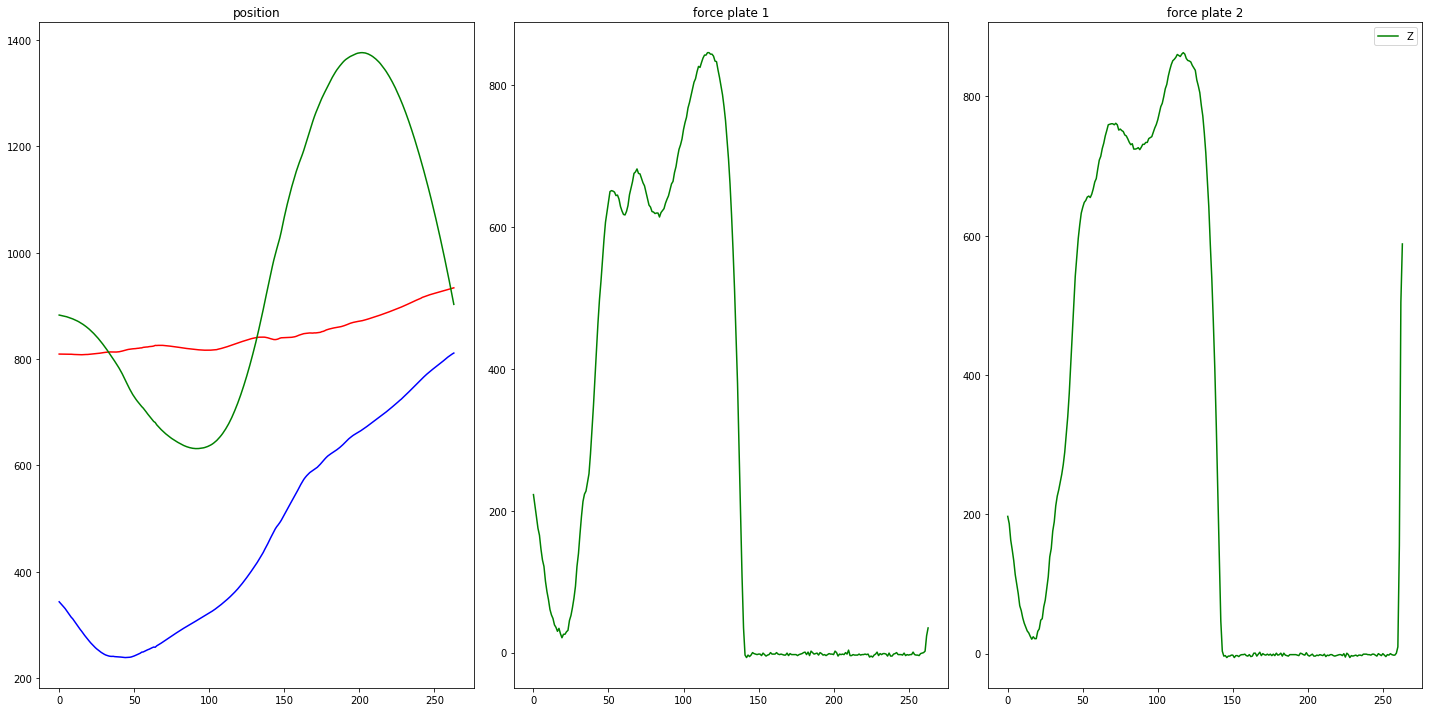

In [9]:
plt.figure()
plt.figure(figsize=(20, 10))

plt.subplot(1,3,1)
plt.plot(df['R.Hip_X'], 'r', label = 'X')
plt.plot(df['R.Hip_Y'], 'b', label = 'Y')
plt.plot(df['R.Hip_Z'], 'g', label = 'Z')
plt.title('position')

plt.subplot(1,3,2)
#plt.plot(df1['GRW1.F_X'], 'r', label = 'X')
#plt.plot(df1['GRW1.F_Y'], 'b', label = 'Y')
plt.plot(df1['GRW1.F_Z'], 'g', label = 'Z')
plt.title('force plate 1')


plt.subplot(1,3,3)
#plt.plot(df1['GRW2.F_X'], 'r', label = 'X')
#plt.plot(df1['GRW2.F_Y'], 'b', label = 'Y')
plt.plot(df1['GRW2.F_Z'], 'g', label = 'Z')
plt.title('force plate 2')

plt.tight_layout()
plt.legend()
plt.show()

In [10]:
from vpython import *

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
scene=canvas()
scene.width = 400
scene.height = 400
scene.background = color.white
x = 500
y = 1000
z = 1000

scene.camera.pos = vector(x, y ,0)



# draw axes
arrow(pos=vec(0,0,0), axis = vec(500,0,0), color=color.green)
arrow(pos=vec(0,0,0), axis = vec(0,500,0), color=color.red) ## Transformed z plane
arrow(pos=vec(0,0,0), axis = vec(0,0,500), color=color.blue) ## Transformed y plane

#initialize markers
balls = []

i = 0
for i in range(pos_data.shape[1]-2):
    
    if i % 3==0:
        ball = sphere(pos=vec(pos_data[0,i],pos_data[0,i+2],pos_data[0,i+1]), radius=20, color=(vec(1,1,1)+vec.random())/2 , make_trail = False, visible = True)
        balls.append(ball)

    i = i +1
    
    
#initialize forces
forces = []

force1 = arrow(pos=vector(500, 0,500), axis=5*vector(force_data[0,0],force_data[0,2],force_data[0,1]), shaftwidth=100, color=(vec(1,1,1)+vec.random())/2 ,  visible = True)
forces.append(force1)

force2 = arrow(pos=vector(1000, 0,500), axis=1.5*vector(force_data[12,0],force_data[12,2],force_data[12,1]), shaftwidth=100, color=(vec(1,1,1)+vec.random())/2 ,  visible = True)
forces.append(force2)

#initialize pipe
#pipe = cylinder(pos=vector(pos_data[0,0],pos_data[0,2], pos_data[0,1]),  axis=vector(pos_data[0,3]-pos_data[0,0],pos_data[0,5]-pos_data[0,2], pos_data[0,4]-pos_data[0,1]), radius=5)

#pipes = []

#p = 0
#for p in range(pos_data.shape[1]-2):
    
 #   if p % 3==0 and p < 114:
  #      pipe = cylinder(pos=vector(pos_data[0,p],pos_data[0,p+2], pos_data[0,p+1]),  axis=vector(pos_data[0,p+3]-pos_data[0,p],pos_data[0,p+5]-pos_data[0,p+2], pos_data[0,p+4]-pos_data[0,p+1]), radius=5)
   #     pipes.append(pipe)
        
        
#click to play animation
scene.waitfor("click")

#play Nplay frames before pausing and waiting for a click
#Nplay=10

#show evolution of position
for row in range(1,pos_data.shape[0]):
    rate(40)
    j=0
    l = 0
    for k in range(pos_data.shape[1]-2):
        if k % 3==0:
            if pos_data[row,k] != 0:
                balls[j].pos = vec(pos_data[row,k],pos_data[row,k+2], pos_data[row,k+1])
                balls[j].visible = True
                if k % 4==0 and l < 2:
                    forces[l].axis = 1.5*vector(force_data[row,k],force_data[row,k+2],force_data[row,k+1])
                    forces[l].visible = True
                    l = l+1
            
            else:
                balls[j].visible = False
               
            j = j+1
    
    #pause
    #if row % Nplay==0:
        #scene.waitfor("click")



<IPython.core.display.Javascript object>

In [16]:
p

114